# PROJECT : HANDWRITTEN DIGIT RECOGNITION SYSTEM

## Data Preprocessing

### Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Digits_df = pd.read_csv("archive/train.csv")
Digits_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## INSIGHTS ON MNIST HANDWRITTEN DIGIT DATASET

#### It is a set of 70,000 small images of digits handwritten by high school students and employees of the US causes Bureau.
#### Each image has 28*28 = 784 features.
#### Also Each image has 28*28 pixels.
#### Following is the Sample images from MNIST test dataset taken from Wikipedia.

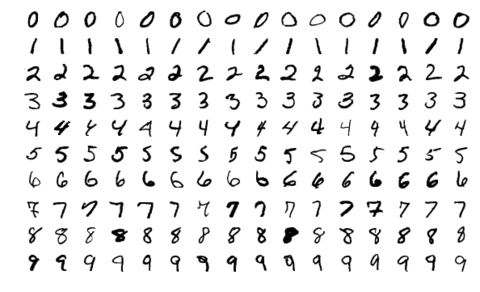

In [2]:
print(Digits_df.shape)
Digits_df.isnull().sum()

(42000, 785)


label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## There is no null value and categorical Data

### Splitting Feature Matrix(X) and Column Vector(Y) then training and testing dataset

In [3]:
X = Digits_df.iloc[:, 1:].values
Y = Digits_df.iloc[:, 0].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(x_train.shape, x_test.shape)

(33600, 784) (8400, 784)


### Now Data is ready for Modelling

### Check a Digit as image

6


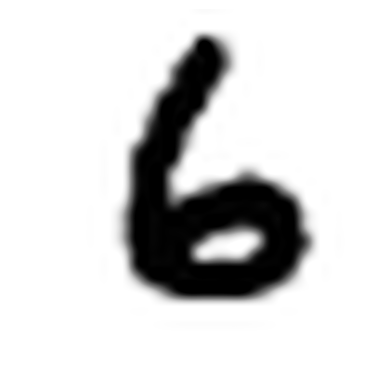

In [4]:
i = 12345
See_Digit = x_train[i].reshape(28, 28)
print(y_train[i])

plt.imshow(See_Digit, cmap="Greys", interpolation="blackman")
plt.axis("off")
plt.show()

## Applying Classification Models

### 1. Gaussian Naive Bayes Classifier

In [5]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB()

In [6]:
y_predict_GNB = GNB.predict(x_test)

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
print("Confusion Matrix GNB: \n", confusion_matrix(y_test, y_predict_GNB))

Confusion Matrix GNB: 
 [[756   2   1   3   1   1  29   1  17  11]
 [  0 928   2   6   1   2   9   2  21   8]
 [ 92  38 182 145   1   4 224   2 143  13]
 [ 53  50   5 456   2   0  57   9 158  85]
 [ 23  11   6   7 119   2 113   2 136 349]
 [101  30   2  28   5  39  65   2 436  78]
 [  6  15   1   1   0   4 788   0   8   2]
 [  2   6   0   7   9   1   3 293  18 513]
 [ 12 130   0  12   2   4  37   1 483 130]
 [  2   7   4   1   6   1   0  12  17 788]]


### 2. Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_test, y_test)

RandomForestClassifier()

In [10]:
y_predict_RF = RF.predict(x_test)

In [11]:
print("Confusion Matrix RF: \n", confusion_matrix(y_test, y_predict_RF))

Confusion Matrix RF: 
 [[822   0   0   0   0   0   0   0   0   0]
 [  0 979   0   0   0   0   0   0   0   0]
 [  0   0 844   0   0   0   0   0   0   0]
 [  0   0   0 875   0   0   0   0   0   0]
 [  0   0   0   0 768   0   0   0   0   0]
 [  0   0   0   0   0 786   0   0   0   0]
 [  0   0   0   0   0   0 825   0   0   0]
 [  0   0   0   0   0   0   0 852   0   0]
 [  0   0   0   0   0   0   0   0 811   0]
 [  0   0   0   0   0   0   0   0   0 838]]


### 3. Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
y_predict_DT = DT.predict(x_test)

In [14]:
print("Confusion Matrix DT: \n", confusion_matrix(y_test, y_predict_DT))

Confusion Matrix DT: 
 [[738   0   7   8   8  18  19   4   6  14]
 [  1 937   9   5   3   1   4   9  10   0]
 [  6  23 693  27   8   9  12  32  26   8]
 [  6   8  42 705   5  39   5  24  20  21]
 [  5  11  11   4 672   5  10   8  14  28]
 [ 11   9   5  49  13 623  20  10  28  18]
 [ 11   8  14   7  16  13 734   2  17   3]
 [  1   3  20  10   5   2   1 779   7  24]
 [ 17  21  23  28  21  34  22   9 612  24]
 [  5   2  11  22  43  15   4  25  24 687]]


### 4. KNN Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
y_predict_KNN = KNN.predict(x_test)

In [17]:
print("Confusion Matrix KNN: \n", confusion_matrix(y_test, y_predict_KNN))

Confusion Matrix KNN: 
 [[814   1   1   1   0   2   3   0   0   0]
 [  0 973   1   1   1   0   0   2   0   1]
 [  7  20 791   3   1   1   0  19   2   0]
 [  2   6   6 831   1   8   0  10   4   7]
 [  0  10   0   0 738   0   1   0   0  19]
 [  2   1   1   8   1 755  10   1   1   6]
 [  3   1   0   0   1   2 818   0   0   0]
 [  1  13   1   0   0   0   0 826   0  11]
 [  7  14   1  16   5  14   7   3 736   8]
 [  2   1   1  12   7   1   0  14   2 798]]


## Comparing Models

In [18]:
from sklearn.metrics import accuracy_score, precision_score, mean_absolute_error,mean_squared_error,r2_score, f1_score

### 1. Accuracy Score

In [19]:
print("Accuracy Score GNB: ", accuracy_score(y_test, y_predict_GNB))
print("Accuracy Score Random Forest: ", accuracy_score(y_test, y_predict_RF))
print("Accuracy Score Decision Tree: ", accuracy_score(y_test, y_predict_DT))
print("Accuracy Score KNN: ", accuracy_score(y_test, y_predict_KNN))

Accuracy Score GNB:  0.5752380952380952
Accuracy Score Random Forest:  1.0
Accuracy Score Decision Tree:  0.8547619047619047
Accuracy Score KNN:  0.9619047619047619


### 2. f1 Score

In [20]:
print("f1 Score GNB: ", f1_score(y_test, y_predict_GNB, average='micro'))
print("f1 Score Random Forest: ", f1_score(y_test, y_predict_RF, average='micro'))
print("f1 Score Decision Tree: ", f1_score(y_test, y_predict_DT, average='micro'))
print("f1 Score KNN: ", f1_score(y_test, y_predict_KNN, average='micro'))

f1 Score GNB:  0.5752380952380952
f1 Score Random Forest:  1.0
f1 Score Decision Tree:  0.8547619047619046
f1 Score KNN:  0.9619047619047619


### Testing a random Test Data

GNB:  [6]
RF:  [6]
DT:  [6]
KNN:  [6]


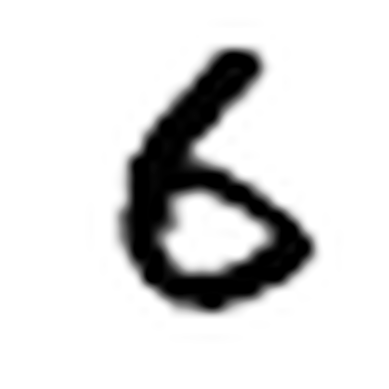

In [21]:
j = 100
See_Digit = x_test[j].reshape(28, 28)
print("GNB: ", GNB.predict(x_test[j].reshape(1, 784)))
print("RF: ", RF.predict(x_test[j].reshape(1, 784)))
print("DT: ", DT.predict(x_test[j].reshape(1, 784)))
print("KNN: ", KNN.predict(x_test[j].reshape(1, 784)))

plt.imshow(See_Digit, cmap="Greys", interpolation="blackman")
plt.axis("off")
plt.show()

In [24]:
import pickle

pickle.dump(RF, open("../App/models/Digit_Recognition_model_RFv2.sav", 'wb'))